In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.utils import shuffle

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
(5000, 400)
(5000, 1)


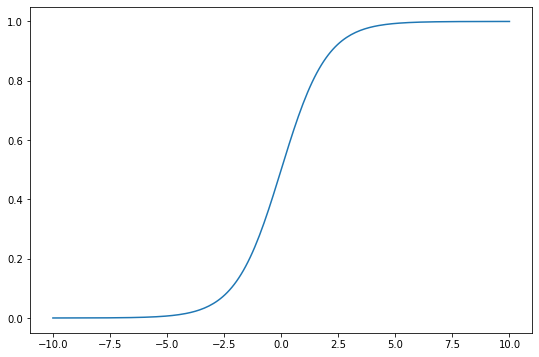

In [195]:
data = loadmat('ex3data1.mat')
print(data.keys())

X = data['X']
y = data['y']
print(X.shape)
print(y.shape)
y[y==10] = 0

xx = np.linspace(-10, 10, 200)
plt.figure(figsize=(9, 6))
plt.plot(xx, sigmoid(xx))

In [196]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

def cost_function(X, y, theta):
    m = len(X)
    y_hat = sigmoid(X @ theta)
    part1 = y * np.log(y_hat)
    part2 = (1 - y) * np.log(1 - y_hat)
    return -1 / m * np.sum(part1 + part2)

In [197]:
def get_examples(dataset, y, target, m):
    digits = dataset[y.flatten() == target]
    other_digits = dataset[y.flatten() != target]
    np.random.shuffle(other_digits)
    result = np.r_[digits[:m], other_digits[:m]]
    labels = np.r_[np.ones(m), np.zeros(m)]
    result, labels = shuffle(result, labels)
    
    return result, labels

examples, labels = get_examples(X, y, 4, 100)
print(labels)

[1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1.]


In [198]:
def cost_function(X, y, theta):
    m, n = X.shape
    y = y.reshape((-1, 1))
    #print('X shape = ', X.shape)
    #print('y shape = ', y.shape)
    y_hat = sigmoid(X @ theta)
    part1 = y * np.log(y_hat)
    part2 = (1 - y) * np.log(1 - y_hat)
    
    return -1/m * np.sum(part1 + part2)

print(examples.shape)
print(labels.shape)
theta = np.zeros(400)
cost_function(examples, labels, theta)

(200, 400)
(200,)


138.62943611198907

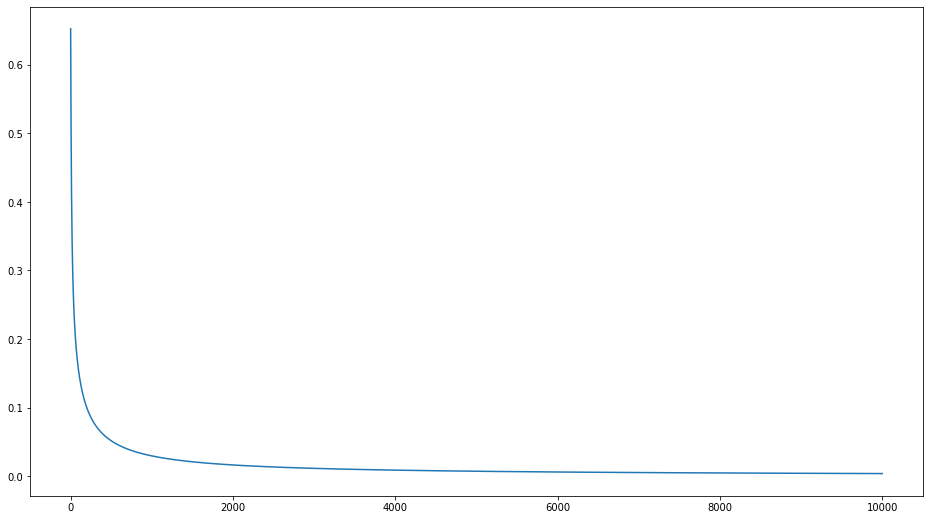

In [199]:
def gradient(X, y, theta, alpha = 0.02, epochs=50000):
    m = len(X)
    y = y.reshape((-1, 1))
    costs = []
    theta = theta.reshape((-1, 1))
    for epoch in range(epochs):
        y_hat = sigmoid(X @ theta)
        error = y_hat - y
        theta -= 1 / m * alpha * X.T @ error
        
        if epoch % 1 == 0:
            costs.append(cost_function(X, y, theta))
    
    return theta, costs

theta, costs = gradient(examples, labels, theta, alpha=0.1, epochs=10000)

plt.figure(figsize=(16, 9))
plt.plot(costs)

In [167]:
def predict(X, y, theta):
    y = y.reshape((-1, 1))
    y_hat = (X @ theta) > 0
    print(y_hat.shape)
    print(y.shape)
    print('accuracy =', np.sum(y_hat == y) / len(y))
    
fours, labels = get_examples(X, y, 4, 300)
predict(fours, labels, theta)

(600,)
(600, 1)
accuracy = 300.0


Theta shape = (400, 10)
(400, 1)
(400, 1)
(400, 1)
(400, 1)
(400, 1)
(400, 1)
(400, 1)
(400, 1)
(400, 1)
(400, 1)


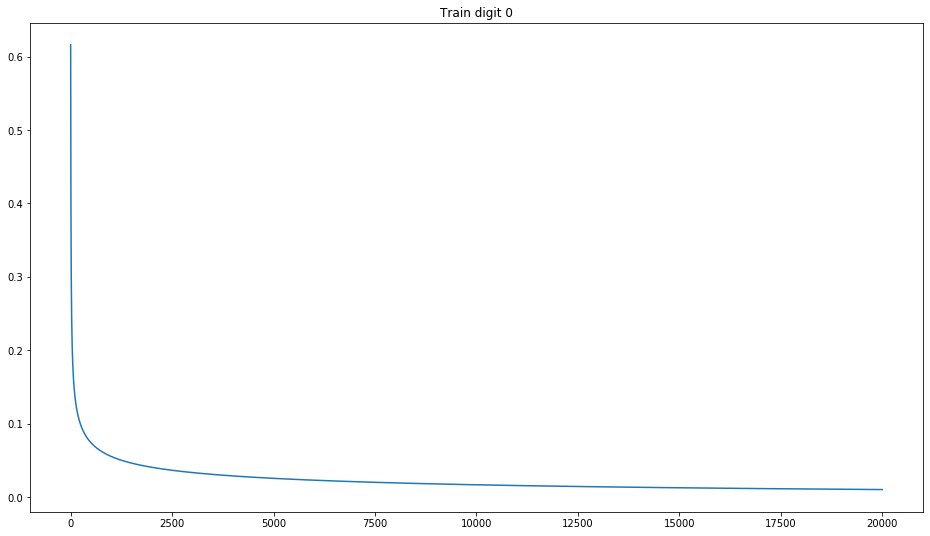

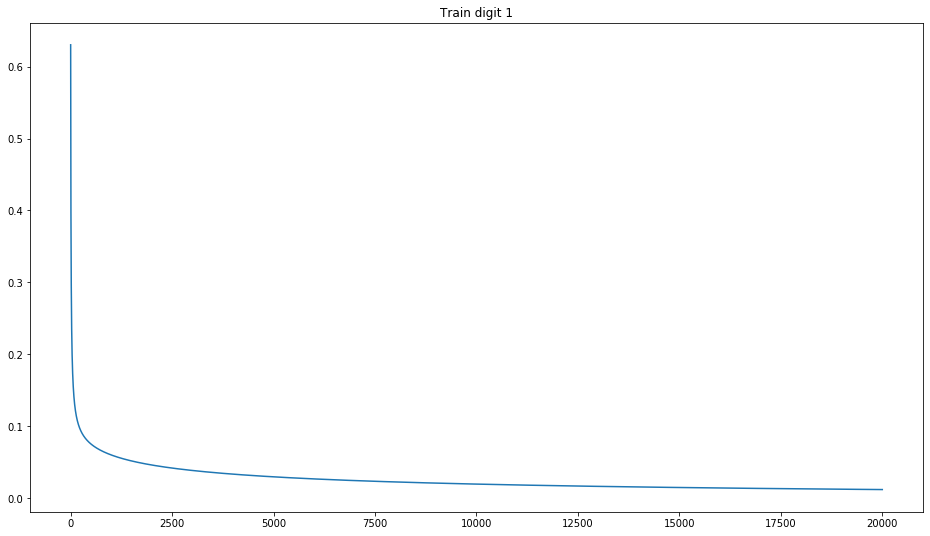

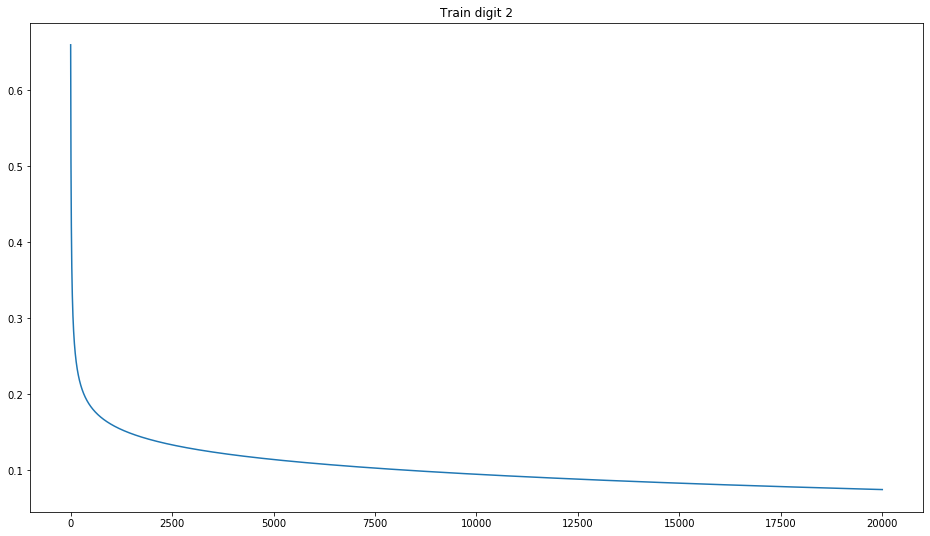

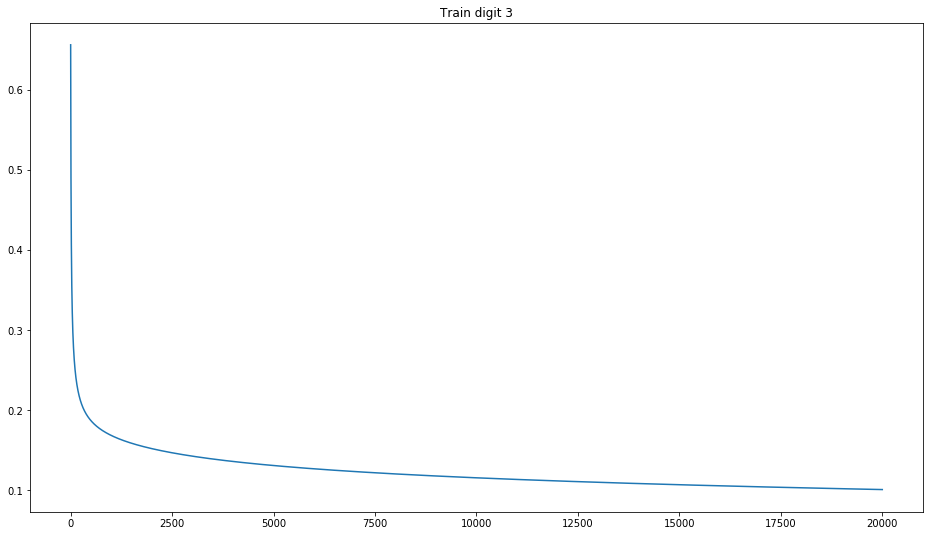

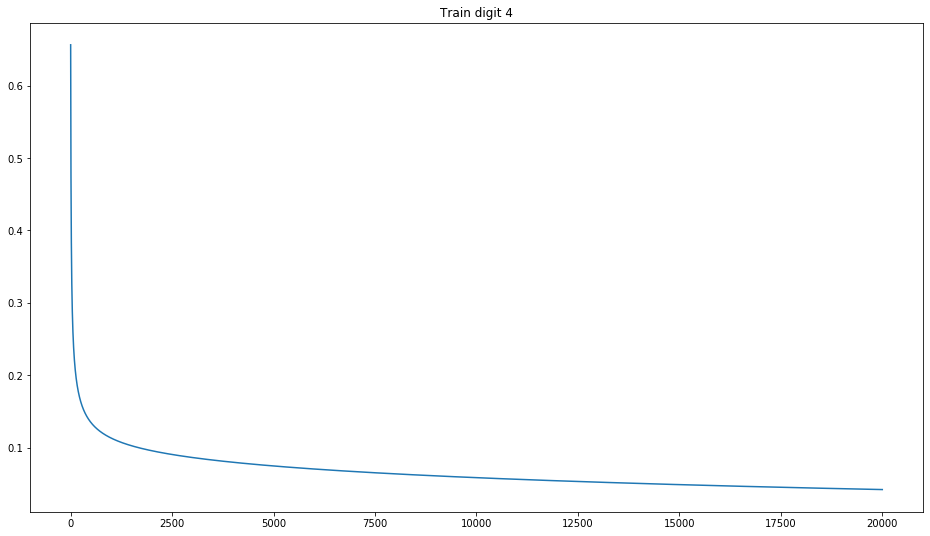

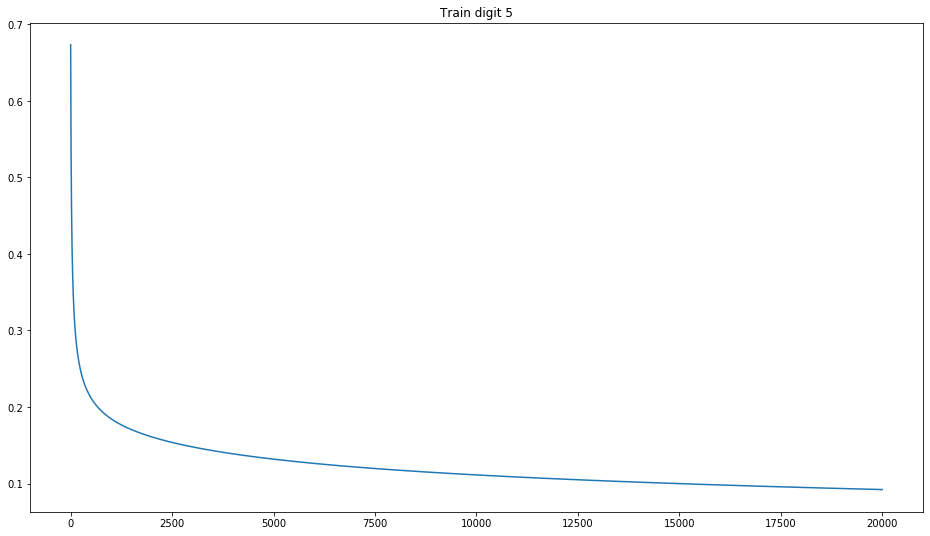

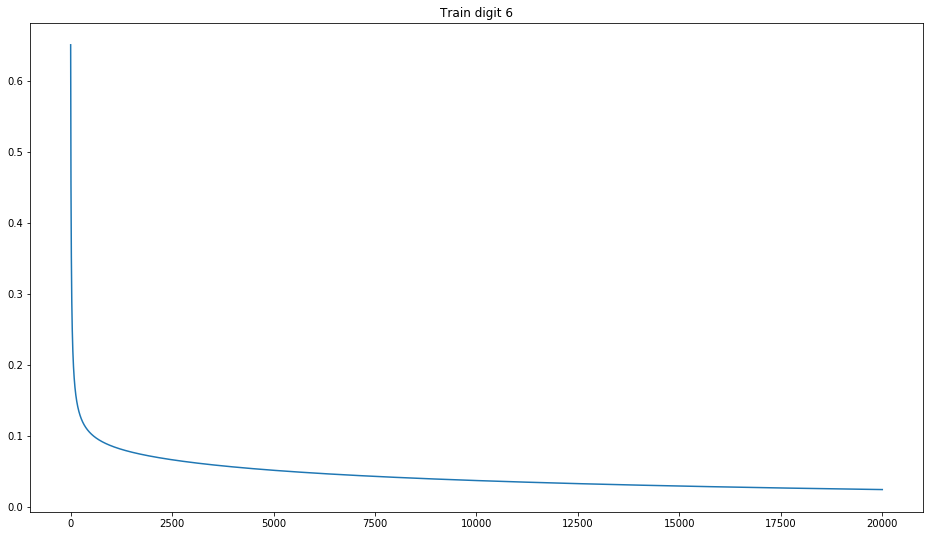

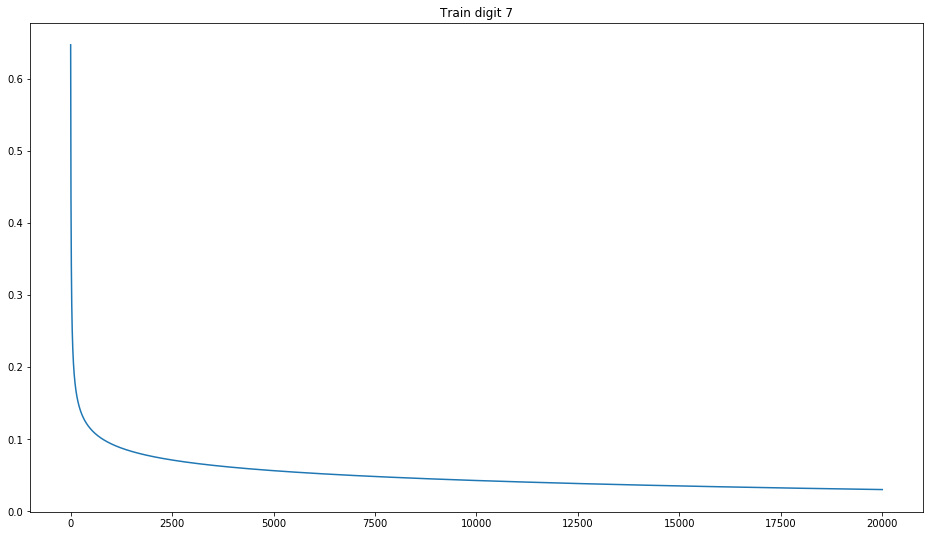

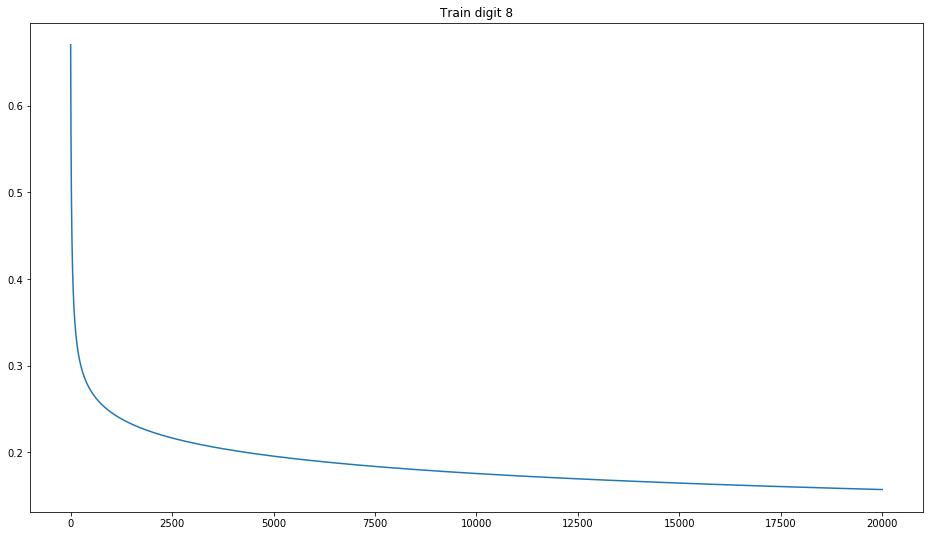

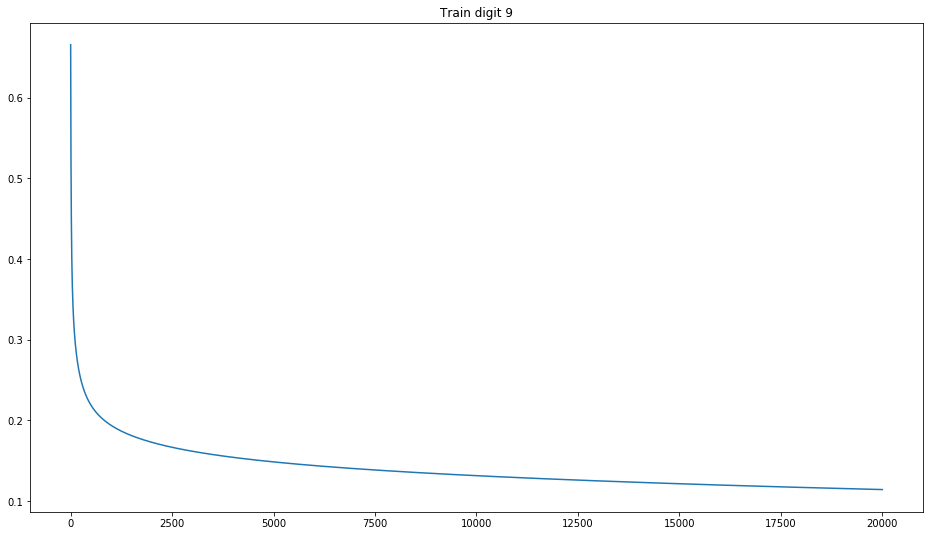

In [205]:
m, n = X.shape
K = 10
Thetas = np.zeros((n, 10))
print('Theta shape =', Thetas.shape)
costs = []
def train(m, alpha=0.1, epochs=20000):
    for i in range(10):
        digits, labels = get_examples(X, y, i, m)
        theta = np.zeros(n)
        theta, cost = gradient(digits, labels, theta, alpha, epochs)
        print(theta.shape)
        Thetas[:, i:i+1] = theta.reshape((-1, 1))
        costs.append(cost)
        plt.figure(figsize=(16, 9))
        plt.plot(cost)
        plt.title('Train digit %s' % i)
train(500)


In [209]:
X_sub, y_sub = shuffle(X, y)
y_hat = X_sub @ Thetas
y_hat = np.argmax(y_hat, axis=1)
print(y_hat)
y_sub = y_sub.flatten()
print(y_sub)
print('accuracy = ', np.sum(y_hat == y_sub) / len(y))

[2 3 7 ... 0 8 5]
[2 3 7 ... 9 4 5]
accuracy =  0.902
